# Homework 4 - Outputs file

## 1. Implementing your own Shazam

#### Import the file "functions_hw4.py"

In this file there are:

- All the functions from the file  "AudioSignals.ipynb"
- All the functions written to run the algorithm and to show the outputs
- Other useful utility functions and list of absolute paths to open files

In [9]:
import functions_hw4 as f

#### Load useful files in memory 

1. "Standard version" with only MinHash with DURATION = 15 seconds

In [2]:
shingles = f.load_pickle(f.PATH_SHINGLES_FILE_NUMPY)
song_peaks = f.load_pickle(f.PATH_DICT_FILE)
matrix = f.load_pickle(f.PATH_MATRIX)

2. "Standard version" with only MinHash with DURATION = 15 seconds

In [3]:
shingles_30 = f.load_pickle(f.PATH_SHINGLES_FILE_NUMPY30)
song_peaks_30 = f.load_pickle(f.PATH_DICT_FILE30)
matrix_30 = f.load_pickle(f.PATH_MATRIX30)

3. "Rounded peaks" version of the algorithm with LSH

In [4]:
shingles_rounded = f.load_pickle(f.PATH_SHINGLES_FILE_ROUNDED)
song_peaks_rounded = f.load_pickle(f.PATH_DICT_FILE_ROUNDED)
matrix_rounded = f.load_pickle(f.PATH_MATRIX_ROUNDED)

### **Important** explanation of the whole implementation

We implemented our shazam function in two ways, depending on the peaks extraction:

1. We extracted the peaks from songs without rounding them. Infact we have precise peaks for each song and then apply **only** the "MinHash" algorithm directly. In this case "LHS" algorithm is almost useless becouse frequencies are very precise and it's difficult to define buckets with very different numbers.
2. We extracted the peaks from songs rounding them and then apply **together** "MinHash" and "LSH"

### 1.1 Getting your data!

#### Download the dataset


In [ ]:
!pip install kaggle #first we install kaggle

In [ ]:
%cd # we move to root
!mv /content/drive/MyDrive/ADM-HW4/kaggle.json .kaggle # in order to use kaggle we have to move the kaggle.json file in the .kaggle folder that is located in root

In [ ]:
%cd /content/drive/MyDrive/ADM-HW4 # we change the directory in the one we want to download the file
!kaggle datasets download -d dhrumil140396/mp3s32k # we use the API command to download the zipped dataset file
!unzip mp3s32k.zip # we unzip the file and now we can work on it

#### Download the query songs

In [ ]:
!sudo apt install wget # with command wget we can easily download files from multiple links with just a command 

In [ ]:
!wget https://sapienza2021adm.s3.eu-south-1.amazonaws.com/hw4/queries/track1.wav https://sapienza2021adm.s3.eu-south-1.amazonaws.com/hw4/queries/track2.wav https://sapienza2021adm.s3.eu-south-1.amazonaws.com/hw4/queries/track3.wav https://sapienza2021adm.s3.eu-south-1.amazonaws.com/hw4/queries/track4.wav https://sapienza2021adm.s3.eu-south-1.amazonaws.com/hw4/queries/track5.wav https://sapienza2021adm.s3.eu-south-1.amazonaws.com/hw4/queries/track6.wav https://sapienza2021adm.s3.eu-south-1.amazonaws.com/hw4/queries/track7.wav https://sapienza2021adm.s3.eu-south-1.amazonaws.com/hw4/queries/track8.wav https://sapienza2021adm.s3.eu-south-1.amazonaws.com/hw4/queries/track9.wav https://sapienza2021adm.s3.eu-south-1.amazonaws.com/hw4/queries/track10.wav

#### Convert the tracks to wav

In [ ]:
data_folder = Path(f.PATH_SONGS_FOLDER)
mp3_tracks = data_folder.glob("*/*/*.mp3")
tracks = data_folder.glob("*/*/*.wav")

In [ ]:
for track in tqdm(mp3_tracks, total=N_TRACKS):
    convert_mp3_to_wav(str(track))

### 1.2 Fingerprint hashing

#### Initial processing operations 

Get all the songs paths from the list file

In [5]:
with open(f.PATH_ALL_LIST, 'r') as f:
     song_path = [row.replace('\n', '.wav') for row in f.readlines()]

This is an example of how the files defined and read above are created and stored as files (this is the "rounded" peaks case)

**We don't need to execute them if we already have the files in our computer**

In [ ]:
song_peaks = f.extract_peaks(song_path, True)
f.save_pickle(song_peaks, f.PATH_DICT_FILE_ROUNDED)

In [ ]:
shingles = f.unique_shingles(song_peaks)
f.save_pickle(shingles, f.PATH_SHINGLES_FILE_ROUNDED)

In [ ]:
matrix = shingles_matrix(shingles, song_peaks)
f.save_pickle(matrix, f.PATH_MATRIX_ROUNDED)

#### Apply MinHash directly algorithm to the not rounded (15 seconds version)

Default value of permutation is 20

In [10]:
hash_matrix_not_rounded = f.hash_matrix(matrix, shingles, song_peaks)

100%|██████████| 20/20 [00:16<00:00,  1.21it/s]


In [11]:
for i in range(1,11):
    f.shazam(f.PATH_TEST_QUERY + f'{i}.wav', hash_matrix_not_rounded, shingles)

Im listening to your music, please dont make noise ...
Maybe you were looking for this song:  dream on - aerosmith 
-----------------------

Im listening to your music, please dont make noise ...
Maybe you were looking for this song:  i want to break free - queen 
-----------------------

Im listening to your music, please dont make noise ...
Maybe you were looking for this song:  october - u2 
-----------------------

Im listening to your music, please dont make noise ...
Maybe you were looking for this song:  ob-la-di ob-la-da - beatles 
-----------------------

Im listening to your music, please dont make noise ...
Maybe you were looking for this song:  karma police - radiohead 
-----------------------

Im listening to your music, please dont make noise ...
Maybe you were looking for this song:  heartbreaker - led zeppelin 
-----------------------

Im listening to your music, please dont make noise ...
Maybe you were looking for this song:  go your own way - fleetwood mac 
---------

#### Apply MinHash directly algorithm to the not rounded (30 seconds version)

In order to apply this we have to set the value of DURATION in "functions_hw4.py" file to 30

In [12]:
f.DURATION = 30

In [13]:
hash_matrix_not_rounded_30 = f.hash_matrix(matrix_30, shingles_30, song_peaks_30)

100%|██████████| 20/20 [00:33<00:00,  1.67s/it]


In [14]:
for i in range(1,11):
    f.shazam(f.PATH_TEST_QUERY + f'{i}.wav', hash_matrix_not_rounded_30, shingles_30)

Im listening to your music, please dont make noise ...
Maybe you were looking for this song:  dream on - aerosmith 
-----------------------

Im listening to your music, please dont make noise ...
Maybe you were looking for this song:  i want to break free - queen 
-----------------------

Im listening to your music, please dont make noise ...
Maybe you were looking for this song:  october - u2 
-----------------------

Im listening to your music, please dont make noise ...
Maybe you were looking for this song:  ob-la-di ob-la-da - beatles 
-----------------------

Im listening to your music, please dont make noise ...
Maybe you were looking for this song:  karma police - radiohead 
-----------------------

Im listening to your music, please dont make noise ...
Maybe you were looking for this song:  heartbreaker - led zeppelin 
-----------------------

Im listening to your music, please dont make noise ...
Maybe you were looking for this song:  go your own way - fleetwood mac 
---------

#### Apply MinHash and LSH together to the rounded version

We have to reset to 15 seconds the duration for the rounded version

In [18]:
f.DURATION = 15

In [19]:
hash_matrix_rounded = f.hash_matrix(matrix_rounded, shingles_rounded, song_peaks_rounded)

100%|██████████| 20/20 [00:00<00:00, 110.78it/s]


In [20]:
buckets = f.db_buckets(hash_matrix_rounded, n_bands=5)

In [21]:
for i in range(1,11):
    f.shazamLSH(f.PATH_TEST_QUERY + f'{i}.wav', hash_matrix_rounded, shingles_rounded, buckets)

Im listening to your music, please dont make noise ...
Maybe you were looking for this song:  dream on - aerosmith 
-----------------------

Im listening to your music, please dont make noise ...
Maybe you were looking for this song:  i want to break free - queen 
-----------------------

Im listening to your music, please dont make noise ...
Maybe you were looking for this song:  october - u2 
-----------------------

Im listening to your music, please dont make noise ...
Maybe you were looking for this song:  ob-la-di ob-la-da - beatles 
-----------------------

Im listening to your music, please dont make noise ...
Maybe you were looking for this song:  karma police - radiohead 
-----------------------

Im listening to your music, please dont make noise ...
Maybe you were looking for this song:  heartbreaker - led zeppelin 
-----------------------

Im listening to your music, please dont make noise ...
Maybe you were looking for this song:  go your own way - fleetwood mac 
---------

# 2. Grouping songs togheter
We play with a dataset gathering songs from the International Society for Music Information Retrieval Conference. The tracks (songs) include much information. We focus on the track information, features (extracted with librosa library from Python) and audio variables provided by Echonest (now Spotify).testo in corsivo

In [ ]:
import pandas as pd
import glob
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy as sc
from scipy.spatial.distance import cdist 
from sklearn.cluster import KMeans
from scipy.spatial import distance
import sklearn
from sklearn.metrics import silhouette_score
from sklearn import metrics
from yellowbrick.cluster import KElbowVisualizer


In [ ]:
## Mount Drive
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/HW4'

import os
os.chdir(path)

## 2.1 Getting your data!
In this part of the exercise we are gonna extract the data and clean them


In [ ]:
## Load Data
df1 = pd.read_csv('echonest.csv')
df2 = pd.read_csv('features.csv')

In [ ]:
df1.isnull().sum().head(50)

track_id                                  0
audio_features_acousticness               0
audio_features_danceability               0
audio_features_energy                     0
audio_features_instrumentalness           0
audio_features_liveness                   0
audio_features_speechiness                0
audio_features_tempo                      0
audio_features_valence                    0
metadata_album_date                   10412
metadata_album_name                   10257
metadata_artist_latitude               3359
metadata_artist_location               3359
metadata_artist_longitude              3359
metadata_artist_name                      0
metadata_release                          0
ranks_artist_discovery_rank           10304
ranks_artist_familiarity_rank         10304
ranks_artist_hotttnesss_rank          10305
ranks_song_currency_rank              11096
ranks_song_hotttnesss_rank            10923
social_features_artist_discovery          0
social_features_artist_familiari

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13129 entries, 0 to 13128
Columns: 250 entries, track_id to temporal_features_223
dtypes: float64(244), int64(1), object(5)
memory usage: 25.0+ MB


For the column with over 10 thousand NA's we decided to directly not consider the whole column as we consider them not useful for the PCA, while for the other columns where the number of NA's is not drastically big we thought that the best way was to interpolate them with the 'nearest' method

In [ ]:
df1['metadata_artist_latitude'].isnull().sum()

3359

In [ ]:
df1['metadata_artist_longitude'].isnull().sum()

3359

In [ ]:
df1['metadata_artist_latitude'] = df1['metadata_artist_latitude'].interpolate(method = 'nearest')
df1['metadata_artist_longitude'] = df1['metadata_artist_longitude'].interpolate(method = 'nearest')

We look for a column in common to the 2 data sets to perform the join

In [ ]:
set(df1.columns).intersection(set(df2.columns))

{'track_id'}

In [ ]:
## Inner Join
df = pd.merge(left = df1, right = df2, left_on = 'track_id', right_on = 'track_id')

## 2.2 Choose your features


Let's look to the columns that we need to do the PCA (we need to delete the columns with object, categorical data and irrelevant variables) 

In [ ]:
df_new = df.drop(columns=['metadata_artist_location','metadata_artist_name',
                            'metadata_album_date',
                            'metadata_album_name','metadata_release',
                            'ranks_artist_discovery_rank','ranks_artist_familiarity_rank', 'ranks_artist_hotttnesss_rank',
                            'ranks_song_currency_rank', 'ranks_song_hotttnesss_rank'])

## 2.2 Principal Components Analysis



We want to do a dimensionality reduction, so we choose to use the Principal Component Analysis (PCA) method.  

In [ ]:
df_pca = df_new.drop(columns=['track_id'])

#### Standardization

Standardization is a procedure that leads a random variable distributed according to an average μ and variance σ², 
to a random variable with a "standard" distribution, that is of zero average and variance equal to 1.

In [ ]:
## In this way we standardize the features

x = StandardScaler().fit_transform(df_pca)
x = pd.DataFrame(x)

In [ ]:
## PCA

## We leave the empty argument into pca because we want a number of components 
## equal to the number of the features
pca = PCA()
pca.fit(x)


#pca.explained_variance_ratio_

PCA()

#### Cumulate percentage of variance 

The following array shows the cumulative variance of the first 100 components.

In [ ]:
np.cumsum(pca.explained_variance_ratio_)[:100]

array([0.1080524 , 0.18448808, 0.2208393 , 0.24999421, 0.27572699,
       0.29969785, 0.32238567, 0.34413393, 0.36420684, 0.38171801,
       0.39785179, 0.41220401, 0.42570554, 0.43867622, 0.45123161,
       0.46285066, 0.47437718, 0.48568284, 0.49614924, 0.50629368,
       0.51617265, 0.524697  , 0.53273209, 0.54033421, 0.54755404,
       0.55414613, 0.56066346, 0.56672783, 0.57257453, 0.57812457,
       0.58359364, 0.58882496, 0.59399115, 0.59894491, 0.60372394,
       0.60836552, 0.61293231, 0.61739253, 0.62177469, 0.62596953,
       0.63004576, 0.63402986, 0.6379555 , 0.6418094 , 0.64552984,
       0.64913323, 0.65267055, 0.65606222, 0.65945144, 0.66275489,
       0.66603992, 0.66922337, 0.67234985, 0.67545908, 0.67851901,
       0.68148124, 0.68439171, 0.68725278, 0.69009632, 0.69288388,
       0.69564991, 0.69837672, 0.70108335, 0.7037162 , 0.70633711,
       0.7088601 , 0.71135108, 0.71380461, 0.71622181, 0.71862291,
       0.72097241, 0.72331012, 0.72561747, 0.72789759, 0.73017

We can see that the threshold of 70% of explained variance is reached with a total number of 64 components.

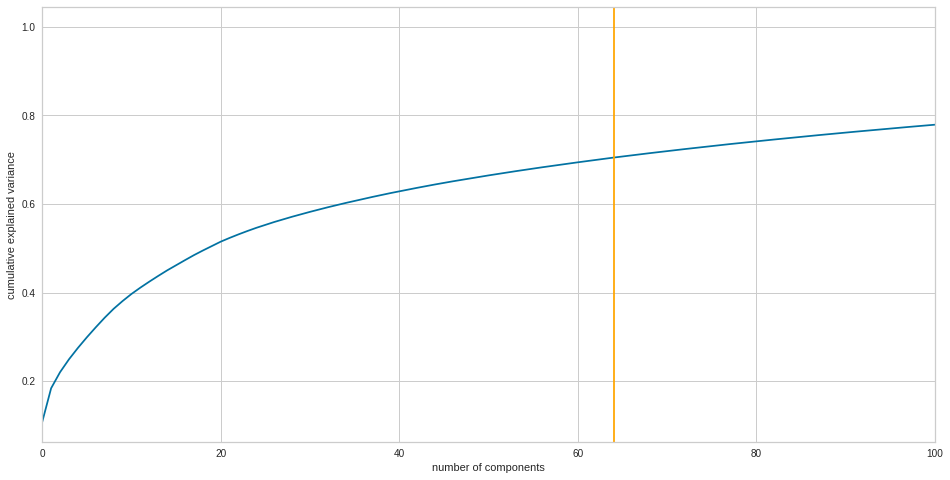

In [ ]:
#loadings = pd.DataFrame(pca.components_.T,
#columns=['PC%s' % _ for _ in range(len(x.columns))],
#index=x.columns)
#print(loadings)
cumulatevariance = np.cumsum(pca.explained_variance_ratio_)
cumulatevariance = cumulatevariance[cumulatevariance <= 0.7019].tolist() #we are gonna take the number of components (n) by taking the length of the first variance ratio that are at least 70%
n = len(cumulatevariance)+1 
plt.figure(figsize=(16,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xlim((0,100))
plt.axvline(n, color = 'orange');
#print('As we can see, the 70% treshold of the total variance is crossed by', n, 'so we are gonna take the first', n , 'components')

# 2.3 Clustering

At this step we select the first 64 score


In [ ]:
dataset = pd.DataFrame(pca.transform(x))
dataset = dataset.iloc[0:, :n]


We implement k-means alghoritm 

Clusters

In [ ]:
## Clustering

K = 20

labels = []
centers = []

for k in range(2,K+1):
    label,center = f.kmeans(dataset,k)
    labels.append(label)
    centers.append(center)

#### Elbow method

In [ ]:
## Within cluster sum of square

Within = []
for center in centers:
    within = np.min(distance.cdist(dataset, center, 'euclidean'),axis=1)
    within=within**2
    Within.append(sum(within))



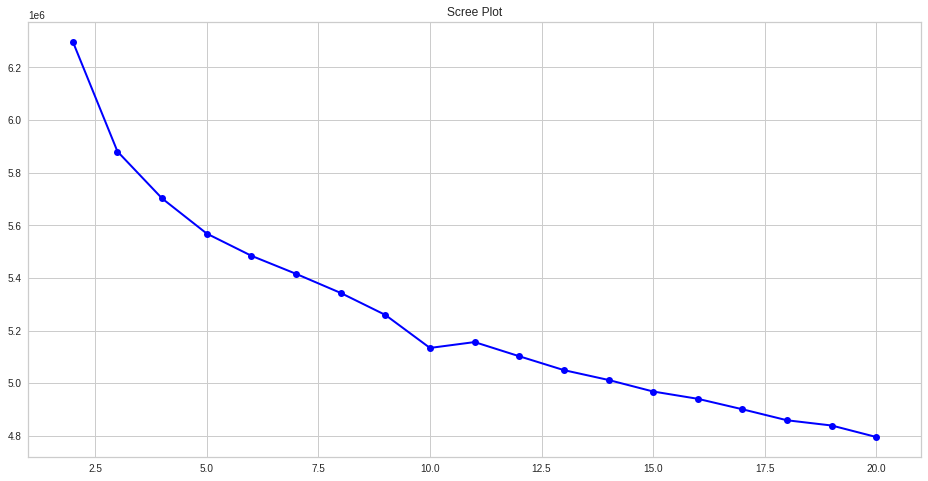

In [ ]:
## Scree Plot 

import matplotlib.pyplot as plt
import numpy as np

x = []

for i in range(2,K+1):
    x.append(i)


plt.figure(figsize=(16,8))
plt.plot(x, Within, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlim((1,21))
plt.show()

From the scree plot we can see that the suggested number of clusters is 10 because we can clearly see a 'scree' (where the function stops decreasing fast)

#### Silhouette

For each point within our data set we calculate the silhouette score S:

$$S = \frac{(b - a)}{max(a, b)}$$

where:
- a is equal to the distance between a point and all other points within the same cluster;
- b is equal to the distance of a point from all points in the nearest cluster.

Once obtained S for each point we compute the mean of the values obtained. 

In [ ]:
silhouette = f.silhouette(dataset,labels,centers)

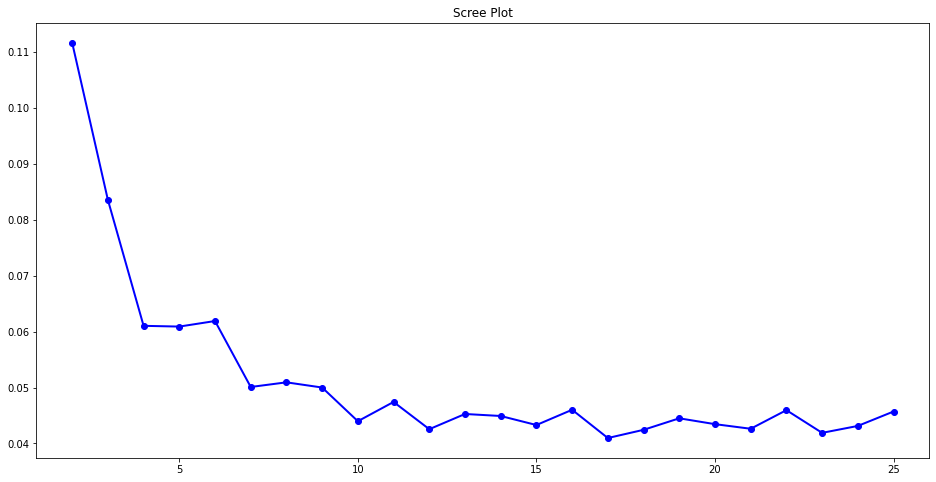

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = []

for i in range(2,26):
    x.append(i)


plt.figure(figsize=(16,8))
plt.plot(x, silhouette, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlim((1,26))
plt.show()

The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. Whenever the value tends to -1 we are in the opposite situation. In this particular case we do not have negative S values for any level of K but we still have small values that do not indicate a level of K which we can define optimal.

Given the above explanations we decided to continue the implementation with k = 10

No handles with labels found to put in legend.


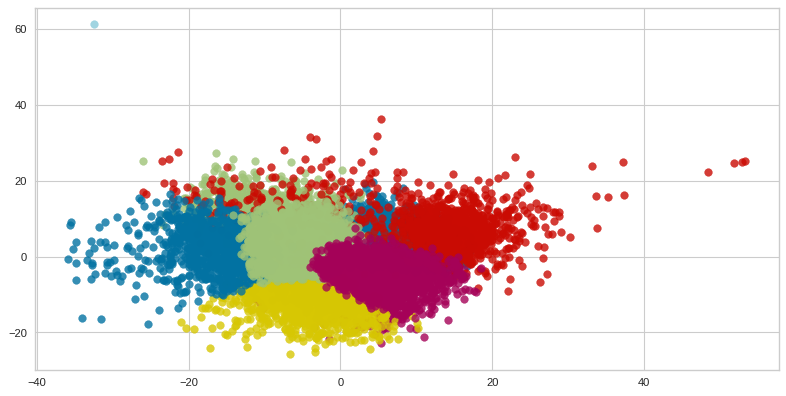

In [ ]:
d = dataset.to_numpy()

figure(figsize = (12, 6), dpi = 80)

u_labels = np.unique(labels[8])

for i in u_labels:

    plt.scatter(d[labels[8] == i , 0] , d[labels[8] == i , 1] , alpha=0.8)

plt.legend()

plt.show()

####  k-means++ (from the scikit-learn library).

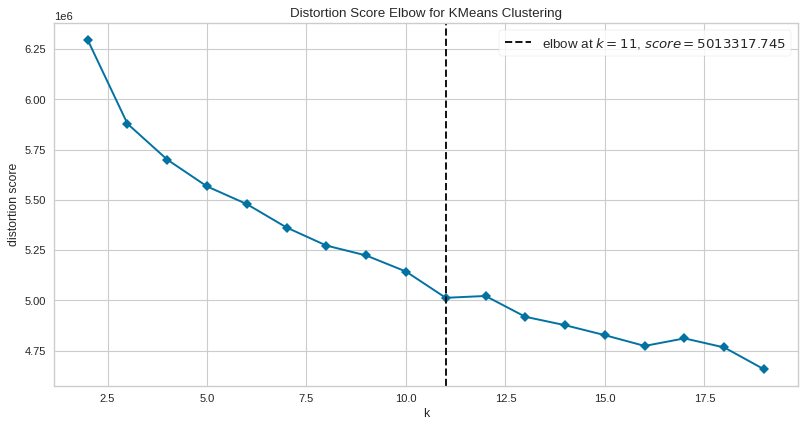

In [ ]:
## Metric = Distortion 

figure(figsize = (12, 6), dpi = 80)

model = KMeans(init = 'k-means++')

visualizer = KElbowVisualizer(model, k = (2,20), metric = 'distortion', timings = False)

visualizer.fit(d)

visualizer.show()

Also in this specific case the first criterion we take into consideration is that of the "Elbow". The results obtained do not differ much from those obtained with the function implemented by us in fact the optimal K in this case is equal to 11 while in the previous case when we used the function implemented by us was equal to 10.

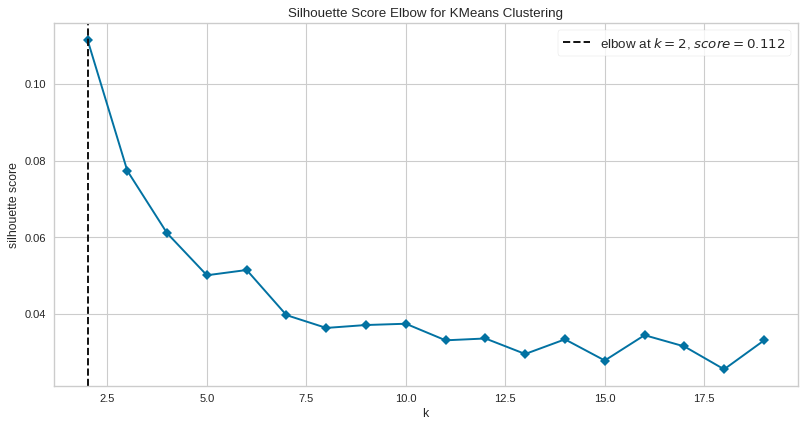

In [ ]:
## Metric = silhouette 

figure(figsize = (12, 6), dpi = 80)

model = KMeans(init = 'k-means++')

visualizer = KElbowVisualizer(model, k = (2,20), metric = 'silhouette', timings = False)

visualizer.fit(d)

visualizer.show()

The second criterion used is the silhouette score. Even here the results are very similar to those obtained previously, the values of the score S are never negative but they are still very low and do not indicate us a K to be able to define optimal.

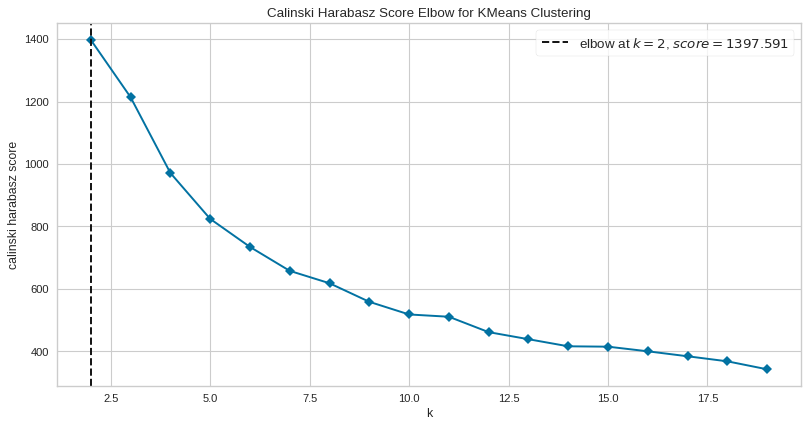

In [ ]:
## Metric = 'calinski_harabasz'

figure(figsize = (12, 6), dpi = 80)

model = KMeans(init = 'k-means++')

visualizer = KElbowVisualizer(model, k = (2,20), metric = 'calinski_harabasz', timings = False)

visualizer.fit(d)

visualizer.show()

For the evaluation of Kmeans ++ it has been chosen to use also another criterion that is that of 'calinski_harabasz'. According to this method the optimal K is 2 but taking such a low K we risk to end up in a situation of "underfitting". This is true even if you consider the graph related to the silhouette score where the best score is given by K=2. It might make more sense to choose not too extreme K values such one beetwen 10 or 11.

# 2.4 Analysing your results!
Select 5-10 variables (from the ones that you had before doing the dimensionality reduction step) you think are relevant to identify the genre of a song. For example, Duration, Language, Country, etc.

In [ ]:
df3 = pd.read_csv('tracks.csv')

In [ ]:
#We need to know all the variables of the dataset to discover which features we need
for col in df1.columns:
    print(col)

In [ ]:
#We are gonna take all the variables regarding the sound of every song
Identifiers = df1[['audio_features_acousticness','audio_features_danceability',
                   'audio_features_energy','audio_features_instrumentalness','audio_features_liveness', 
                   'audio_features_speechiness', 'audio_features_valence']]

#Let's give a cleaner look to the data!
Identifiers = Identifiers.rename(columns={'audio_features_acousticness':'Acousticness', 'audio_features_danceability':'Danceability',
                           'audio_features_energy':'Energy', 'audio_features_instrumentalness':'Instrumentalness', 
                           'audio_features_liveness': 'Liveness', 'audio_features_speechiness':'Speechiness', 
                           'audio_features_valence':'Valence'})
Identifiers.head(11)

,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Speechiness,Valence
0,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,0.576661
1,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,0.269240
2,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,0.621661
3,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,0.963590
4,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,0.894072
5,0.106550,0.260911,0.607067,0.835087,0.223676,0.030569,0.160267
6,0.376312,0.734079,0.265685,0.669581,0.085995,0.039068,0.609991
7,0.963657,0.435933,0.075632,0.345493,0.105686,0.026658,0.163950
8,0.662881,0.379065,0.823856,0.910266,0.088705,0.079090,0.092868
9,0.909011,0.443643,0.641997,0.924092,0.267669,0.089659,0.788251


On the web we found that the variables have the following meanings:

**Acousticness** describes how acoustic a song is. 

**Danceability** describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.

**Energy** represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

**Instrumentalness** represents the amount of vocals in the song.

**Liveness** describes the probability that the song was recorded with a live audience.

**Speechiness** detects the presence of spoken words in a track.

**Valence** represents the musical positiveness conveyed by a track.


In [ ]:
#Now we want to observe if all the features are already standardized.
Identifiers.min(), Identifiers.max()
#as we can see, all the values are between 0 and 1: we don't need to standardize the variables

(Acousticness        9.035000e-07
 Danceability        5.130749e-02
 Energy              2.016590e-05
 Instrumentalness    0.000000e+00
 Liveness            2.529734e-02
 Speechiness         2.232367e-02
 Valence             1.000000e-05
 dtype: float64, Acousticness        0.995796
 Danceability        0.968645
 Energy              0.999964
 Instrumentalness    0.998016
 Liveness            0.980330
 Speechiness         0.966177
 Valence             0.999990
 dtype: float64)

If any of your selected variables are numerical (continuous or discrete), then categorize them into 4 categories

In [ ]:
#CATEGORIZATION OF DATA
for i in range(len(Identifiers)):
    for j in range(len(Identifiers.columns)):
        if (Identifiers.values[i][j]<0.25):
            Identifiers.values[i][j] = 1
        elif (Identifiers.values[i][j]>=0.25) & (Identifiers.values[i][j]<0.5):
            Identifiers.values[i][j] = 2
        elif (Identifiers.values[i][j]>=0.5) & (Identifiers.values[i][j]<0.75):
            Identifiers.values[i][j] = 3
        else:
            Identifiers.values[i][j] = 4

With the selected variables, perform pivot tables. On the horizontal axis, you will have the clusters, and on the vertical axis, you will have the categories of each variable. Notice that you have to do one pivot table per variable.

In [ ]:
labels_10 = labels[8] + 1
Identifiers['#Cluster'] = labels_10
Identifiers.head(11)

,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Speechiness,Valence,#Cluster
0,2.0,3.0,3.0,1.0,1.0,1.0,3.0,10
1,2.0,3.0,4.0,1.0,1.0,2.0,2.0,10
2,1.0,3.0,3.0,1.0,2.0,1.0,3.0,10
3,4.0,3.0,4.0,4.0,1.0,1.0,4.0,1
4,2.0,3.0,3.0,1.0,1.0,3.0,4.0,5
5,1.0,2.0,3.0,4.0,1.0,1.0,1.0,1
6,2.0,3.0,2.0,3.0,1.0,1.0,3.0,8
7,4.0,2.0,1.0,2.0,1.0,1.0,1.0,7
8,3.0,2.0,4.0,4.0,1.0,1.0,1.0,8
9,4.0,2.0,3.0,4.0,2.0,1.0,4.0,1


Calculate the percentage by column for each pivot table. It means that the sum of each column (cluster) must be 1.

Interpret the values for each pivot table



In [ ]:
round(pd.crosstab(index=Identifiers['Acousticness'], columns=Identifiers['#Cluster'], normalize='columns')*100, 2)

#Cluster,1,2,3,4,5,6,7,8,9,10
Acousticness,,,,,,,,,,
1.0,42.39,0.77,11.57,69.61,42.88,0.0,2.55,14.39,41.19,43.06
2.0,11.59,0.00,6.02,14.75,16.62,0.0,3.21,10.09,12.22,18.81
3.0,14.26,0.19,7.87,9.65,14.25,0.0,4.53,15.84,14.27,17.73
4.0,31.76,99.04,74.54,6.00,26.25,100.0,89.71,59.67,32.32,20.40


The acousticness is typical of "genuine" music (music without electronic or artificial sounds). 

The table shows that the clusters 2, 3, 6 and 7 have a big acoustic component, so these groups may represent classic music or historical music.

In [ ]:
round(pd.crosstab(index=Identifiers['Danceability'], columns=Identifiers['#Cluster'], normalize='columns')*100, 2)

#Cluster,1,2,3,4,5,6,7,8,9,10
Danceability,,,,,,,,,,
1.0,21.89,16.38,30.09,2.89,1.03,100.0,14.92,10.24,30.27,4.55
2.0,56.29,58.00,43.06,23.09,18.93,0.0,54.11,45.06,46.05,30.53
3.0,21.13,24.47,24.54,50.31,50.26,0.0,28.71,41.66,19.78,51.74
4.0,0.68,1.16,2.31,23.71,29.78,0.0,2.27,3.04,3.89,13.18


Danceability measures how much a song makes people dance. We don't observe particularly high values, but every cluster have low values in high and medium-high danceability, expecially the clusters 1,2,3,7,8 and 9.

It may be useful to strengthen our previous hypothesis on the genre of clusters 2,3,7.

In [ ]:
round(pd.crosstab(index=Identifiers['Energy'], columns=Identifiers['#Cluster'], normalize='columns')*100, 2)

#Cluster,1,2,3,4,5,6,7,8,9,10,11
Energy,,,,,,,,,,,
1.0,20.27,1.29,5.35,3.37,73.87,85.92,34.15,1.41,78.69,3.15,29.49
2.0,39.64,8.53,8.28,24.36,23.20,12.27,46.79,14.78,19.67,23.53,42.82
3.0,29.53,31.22,21.27,42.02,2.70,1.44,16.83,39.82,1.64,40.32,23.97
4.0,10.56,58.96,65.10,30.25,0.23,0.36,2.23,43.99,0.00,32.99,3.72


The energy is very low into cluster 9 and 5, so we can suppose that genres like Rock and Pop might be less present in this cluster.

In [ ]:
round(pd.crosstab(index=Identifiers['Instrumentalness'], columns=Identifiers['#Cluster'], normalize='columns')*100, 2)

#Cluster,1,2,3,4,5,6,7,8,9,10,11
Instrumentalness,,,,,,,,,,,
1.0,37.37,15.34,12.48,26.18,15.99,22.98,22.36,30.50,0.00,19.50,18.46
2.0,6.22,5.42,5.99,6.91,2.70,4.45,6.53,5.69,3.28,5.06,5.51
3.0,11.59,9.66,10.83,12.47,2.70,8.54,9.13,14.96,4.92,9.46,9.23
4.0,44.82,69.58,70.70,54.44,78.60,64.02,61.98,48.86,91.80,65.98,66.79


Instrumentalness is frequent in every cluster, so we notice only that the cluster number 9 has very high values: it may tell us that this cluster represents a genre with an imposing instrumental, like Hip-Hop.

In [ ]:
round(pd.crosstab(index=Identifiers['Liveness'], columns=Identifiers['#Cluster'], normalize='columns')*100, 2)

#Cluster,1,2,3,4,5,6,7,8,9,10
Liveness,,,,,,,,,,
1.0,78.19,45.47,93.52,86.15,81.51,100.0,85.93,83.98,68.11,73.83
2.0,16.50,35.07,5.09,11.37,14.12,0.0,7.08,11.14,21.95,18.39
3.0,4.16,10.21,1.39,1.79,3.53,0.0,5.95,3.62,7.89,6.14
4.0,1.16,9.25,0.00,0.69,0.83,0.0,1.04,1.27,2.05,1.64


All the values are very similar and low, so we can't see difference between the clusters. all the variables have low values for "Liveness"

In [ ]:
round(pd.crosstab(index=Identifiers['Speechiness'], columns=Identifiers['#Cluster'], normalize='columns')*100, 2)

#Cluster,1,2,3,4,5,6,7,8,9,10
Speechiness,,,,,,,,,,
1.0,99.04,88.05,97.22,90.90,69.00,100.0,97.64,98.19,95.14,82.50
2.0,0.76,5.97,1.39,7.58,17.59,0.0,1.79,1.41,3.24,14.07
3.0,0.20,1.93,0.93,1.03,7.06,0.0,0.19,0.40,1.19,2.58
4.0,0.00,4.05,0.46,0.48,6.35,0.0,0.38,0.00,0.43,0.84


Also the Speechiness returns unrelevant values: all the songs look without the "spoken component", so we can skip the analysis for this pivot table.

In [ ]:
round(pd.crosstab(index=Identifiers['Valence'], columns=Identifiers['#Cluster'], normalize='columns')*100, 2)

#Cluster,1,2,3,4,5,6,7,8,9,10
Valence,,,,,,,,,,
1.0,24.77,21.58,76.39,33.36,19.90,100.0,62.13,36.78,42.81,15.95
2.0,30.44,31.21,11.57,30.39,25.93,0.0,23.32,30.27,24.11,24.39
3.0,26.21,25.43,8.33,23.91,31.58,0.0,9.92,19.93,18.38,32.04
4.0,18.58,21.77,3.70,12.34,22.59,0.0,4.63,13.02,14.70,27.63


The musical positiveness conveyed by a track is described by the "Valence". Every cluster have low valence, except for the number 2, 5 and 10: these clusters hase more positive songs than the others. We can hypothesize that into these clusters there are genres more happy than the others cluster.

Now, it's time to compare the obtained clusters to the reality genre. Use it to answer what is the most representative genre for each one of the clusters.

In [ ]:
#We start by re-creating the joined dataset with genres and the sound variables
Dataframe_genre = pd.merge(left = df, right = df3, left_on = 'track_id', right_on = 'track_id')
#and then we put the 'genre' variable into our dataset
Identifiers['Genre'] = Dataframe_genre['track_genre_top']
Identifiers.head(11)

,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Speechiness,Valence,#Cluster,Genre
0,2.0,3.0,3.0,1.0,1.0,1.0,3.0,10,Hip-Hop
1,2.0,3.0,4.0,1.0,1.0,2.0,2.0,10,Hip-Hop
2,1.0,3.0,3.0,1.0,2.0,1.0,3.0,10,Hip-Hop
3,4.0,3.0,4.0,4.0,1.0,1.0,4.0,1,Pop
4,2.0,3.0,3.0,1.0,1.0,3.0,4.0,5,Hip-Hop
5,1.0,2.0,3.0,4.0,1.0,1.0,1.0,1,Folk
6,2.0,3.0,2.0,3.0,1.0,1.0,3.0,8,Folk
7,4.0,2.0,1.0,2.0,1.0,1.0,1.0,7,Folk
8,3.0,2.0,4.0,4.0,1.0,1.0,1.0,8,Folk
9,4.0,2.0,3.0,4.0,2.0,1.0,4.0,1,Jazz


In [ ]:
round(pd.crosstab(index=Identifiers['Genre'], columns=Identifiers['#Cluster'], normalize='columns')*100, 2)

#Cluster,1,2,3,4,5,6,7,8,9,10
Genre,,,,,,,,,,
Blues,0.50,0.22,0.00,0.21,0.50,0.0,1.88,1.57,0.00,0.40
Classical,0.10,9.05,12.41,0.10,0.20,0.0,23.95,1.63,0.27,0.27
Electronic,5.11,1.10,30.66,49.69,52.05,100.0,16.02,11.35,20.00,36.56
Experimental,0.10,0.44,0.00,0.10,0.20,0.0,0.43,0.16,0.13,0.20
Folk,3.33,9.93,27.74,2.90,1.40,0.0,24.82,25.41,2.55,1.53
Hip-Hop,1.49,0.00,3.65,17.12,24.12,0.0,1.15,2.50,5.23,24.95
Instrumental,0.45,0.66,0.73,0.31,0.90,0.0,1.15,2.06,0.54,0.60
International,0.79,1.10,3.65,0.00,1.10,0.0,2.45,2.88,1.21,1.13
Jazz,0.74,1.55,0.73,1.56,2.50,0.0,10.25,4.07,1.07,1.59


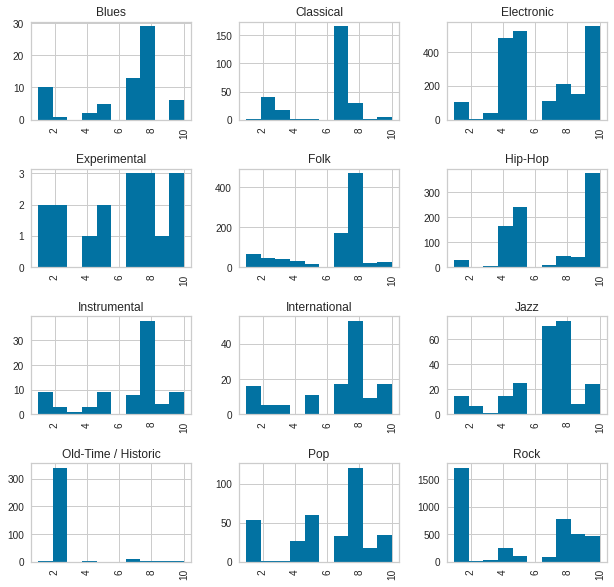

In [ ]:
Identifiers.hist(column='#Cluster', by = 'Genre', figsize=(15,15))
plt.show()
#we decided to plot the data to have a better visualization of the parallelity between clusters and genres  

From the obtained results we can conclude that the clustering has in part succeded: we can observe that our clustering has captured some genres like Old-time/Historic, Rock and Classical are mainly contained into some specific clusters. Old-time features are mainly contained into Cluster 2, Rock's are primarly contained into Cluster 1 and Classical variables are mostly contained into Cluster 7.


Although the clustering is not so accurate because we are working in unsupervised contexts and we are unaware of the "ground truth" at the base of the data. It can be useful in cases like these to be supported by people with specific knowledge of the field of which the data are part so as to be able to have a more accurate technical opinion regarding the features present in the dataset and any results obtained.

# 2.4.7


In [ ]:
df2_pca = df2.drop(columns=['track_id'])

In [ ]:
x2 = StandardScaler().fit_transform(df2_pca)
x2 = pd.DataFrame(x2)

In [ ]:
pca2 = PCA()
pca2.fit(x2)

PCA()

In [ ]:
np.cumsum(pca2.explained_variance_ratio_)[:70]

array([0.11981209, 0.18783652, 0.22978658, 0.26341166, 0.29309699,
       0.32096036, 0.34615863, 0.37018642, 0.39288233, 0.4139717 ,
       0.43203019, 0.44786818, 0.46229333, 0.47595843, 0.48892151,
       0.50137491, 0.51216316, 0.52287975, 0.53301808, 0.54217426,
       0.55077623, 0.55930237, 0.56732985, 0.57528061, 0.58255467,
       0.58971868, 0.59659928, 0.60317865, 0.60969622, 0.61583576,
       0.62180412, 0.62758712, 0.63305729, 0.63837313, 0.64342951,
       0.64839667, 0.65320178, 0.65792701, 0.66255006, 0.66708503,
       0.67142046, 0.67570121, 0.67990594, 0.68405179, 0.6881781 ,
       0.69212525, 0.69601766, 0.69979194, 0.70346478, 0.70709962,
       0.71063087, 0.71410517, 0.71743727, 0.72073475, 0.72397094,
       0.72711942, 0.73019727, 0.73325445, 0.73619701, 0.73909631,
       0.74198861, 0.74482125, 0.74759659, 0.75030818, 0.75298924,
       0.75565874, 0.75828488, 0.76086094, 0.76343457, 0.76593635])

As we can see, the 70% treshold of the total variance is crossed by 49 so we are gonna take the first 49 components


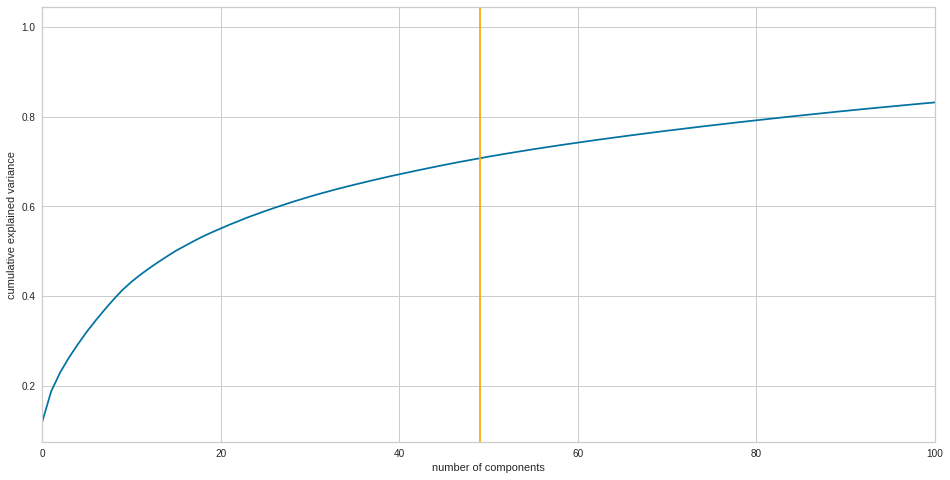

In [ ]:
cumulatevariance = np.cumsum(pca2.explained_variance_ratio_)
cumulatevariance = cumulatevariance[cumulatevariance <= 0.7019].tolist() 
#we are gonna take the number of components (n) by taking the length of the first variance ratio that are at least 70%
n2 = len(cumulatevariance)+1 
plt.figure(figsize=(16,8))
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xlim((0,100))
plt.axvline(n2, color = 'orange');
print('As we can see, the 70% treshold of the total variance is crossed by', n2, 'so we are gonna take the first', n2 , 'components')

In [ ]:
dataset2 = pd.DataFrame(pca2.transform(x2))
dataset2 = dataset2.iloc[0:, :n2]

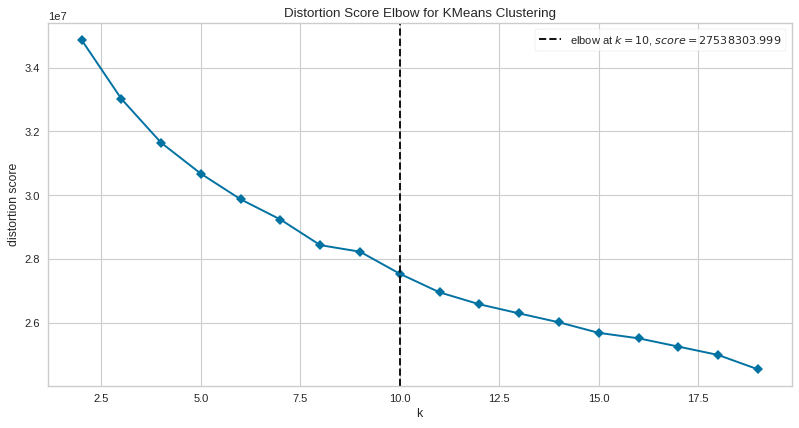

In [ ]:
## Metric = distortion

figure(figsize = (12, 6), dpi = 80)

model = KMeans(init = 'k-means++')

visualizer = KElbowVisualizer(model, k = (2,20), metric = 'distortion', timings = False)

visualizer.fit(dataset2)

visualizer.show()

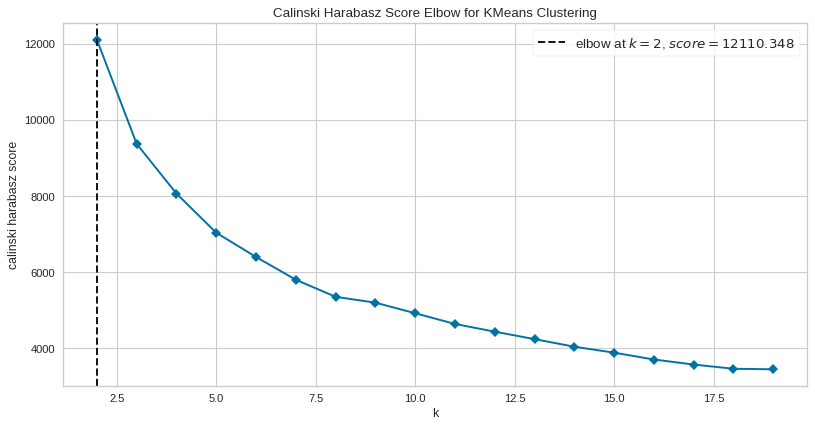

In [ ]:
## Metric = 'calinski_harabasz'

figure(figsize = (12, 6), dpi = 80)

model = KMeans(init = 'k-means++')

visualizer = KElbowVisualizer(model, k = (2,20), metric = 'calinski_harabasz', timings = False)

visualizer.fit(dataset2)

visualizer.show()

We choose 10 as the optimal value of K based on the use of the Elbow method


In [ ]:
clusters_10 = KMeans(init = 'k-means++', n_clusters = 10)
clusters_10.fit(dataset2)

KMeans(n_clusters=10)

In [ ]:
Identifiers2 = df2.loc[:, ('chroma_cqt_mean_01','rmse_median_01','tonnetz_mean_01','spectral_bandwidth_mean_01')]
Identifiers2['track_duration'] = df3.loc[:, ('track_duration')]
Identifiers2['track_bit_rate'] = df3.loc[:, ('track_bit_rate')]


Identifiers2 = Identifiers2.rename(columns={'chroma_cqt_mean_01':'chroma_mean', 'rmse_median_01':'rmse_median',
                           'tonnetz_mean_01':'tonnetz_mean', 'spectral_bandwidth_mean_01':'spectral_bandwidth', 
                           'track_duration': 'duration', 'track_bit_rate':'bit_rate'})
Identifiers2.head(11)

,chroma_mean,rmse_median,tonnetz_mean,spectral_bandwidth,duration,bit_rate
0,0.883210,2.653895,-0.002570,1607.474365,168,256000
1,0.525373,3.706424,0.000183,1736.961426,237,256000
2,0.535632,2.409692,-0.007501,1512.917358,206,256000
3,0.519918,3.756495,-0.021650,1420.259644,161,192000
4,0.443509,4.367132,0.012362,2489.015625,311,256000
5,0.520632,4.758019,0.001712,1103.508057,181,256000
6,0.485450,4.646678,0.002661,2369.657227,174,256000
7,0.731028,3.751399,0.007654,1398.827637,104,256000
8,0.426277,4.371153,0.002270,1773.881348,205,256000
9,0.541520,2.912786,0.007164,1314.968628,207,256000


In [ ]:
#CATEGORIZATION OF DATA
for i in Identifiers2.columns:
    Identifiers2[i] = pd.qcut(Identifiers2[i], q = 4)

In [ ]:
label_10 = clusters_10.labels_ +1

In [ ]:
pivot_bit = round(pd.crosstab(index=Identifiers2['bit_rate'], columns=label_10, normalize='columns')*100, 2)

## Index Row
pivot_bit.index = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
pivot_bit

col_0,1,2,3,4,5,6,7,8,9,10
Category 1,30.23,27.26,25.82,19.79,26.93,24.20,0.0,18.84,25.24,0.0
Category 2,25.68,25.34,21.64,36.08,30.81,24.86,60.0,17.69,20.85,0.0
Category 3,43.72,46.64,52.06,43.78,41.86,50.56,40.0,62.83,53.40,100.0
Category 4,0.37,0.76,0.48,0.35,0.40,0.38,0.0,0.64,0.51,0.0


The bit rate is low for every cluster, but it's higher for the clusters 8 and 6: this cluster maybe has more 'Electronic' and 'Instrumental' features, because these genres have usually more bits.

In [ ]:
pivot_dur = round(pd.crosstab(index=Identifiers2['duration'], columns=label_10, normalize='columns')*100, 2)


## Index Row
pivot_dur.index = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
pivot_dur

col_0,1,2,3,4,5,6,7,8,9,10
Category 1,34.05,50.31,25.11,67.08,27.04,17.19,40.0,18.52,15.76,0.0
Category 2,25.62,20.17,19.57,10.16,29.59,25.59,20.0,23.28,23.82,0.0
Category 3,19.57,15.16,20.79,9.98,23.64,29.99,20.0,29.12,29.08,100.0
Category 4,20.76,14.36,34.53,12.78,19.73,27.24,20.0,29.09,31.34,0.0


The lowest values of the duration is contained into the cluster 4 this explains that the main genre of the cluster may be something popular (like Pop/Electronic), because the pop songs are usually shorter than the other songs.

However, we find the highest value in the number 8


In [ ]:
pivot_chr = round(pd.crosstab(index=Identifiers2['chroma_mean'], columns=label_10, normalize='columns')*100, 2)

pivot_chr.index = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
pivot_chr

col_0,1,2,3,4,5,6,7,8,9,10
Category 1,37.08,7.63,48.46,28.02,14.73,44.90,100.0,19.56,12.27,100.0
Category 2,26.32,11.94,29.06,9.11,27.55,28.97,0.0,19.68,25.52,0.0
Category 3,19.33,23.90,15.02,7.71,32.70,16.85,0.0,23.10,33.66,0.0
Category 4,17.28,56.53,7.46,55.17,25.02,9.27,0.0,37.66,28.55,0.0


In [ ]:
pivot_ton = round(pd.crosstab(index=Identifiers2['tonnetz_mean'], columns=label_10, normalize='columns')*100, 2)

pivot_ton.index = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
pivot_ton

col_0,1,2,3,4,5,6,7,8,9,10
Category 1,24.59,25.02,26.67,36.60,18.73,26.09,0.0,34.59,24.34,0.0
Category 2,16.44,26.70,24.38,28.02,23.92,21.85,60.0,27.48,33.38,0.0
Category 3,19.43,25.41,26.00,11.21,28.72,23.87,40.0,22.38,26.91,0.0
Category 4,39.53,22.88,22.94,24.17,28.63,28.19,0.0,15.55,15.37,100.0


The intonation has normal values for every cluster (except for 6 and 10, that we can skip)

In [ ]:
pivot_spe = round(pd.crosstab(index=Identifiers2['spectral_bandwidth'], columns=label_10, normalize='columns')*100, 2)

pivot_spe.index = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
pivot_spe

col_0,1,2,3,4,5,6,7,8,9,10
Category 1,69.66,20.73,41.52,29.42,14.74,31.31,80.0,12.03,5.51,100.0
Category 2,19.22,22.17,25.79,16.99,32.18,33.56,0.0,16.11,18.40,0.0
Category 3,7.66,23.82,19.24,11.73,31.82,23.76,0.0,26.60,31.48,0.0
Category 4,3.46,33.27,13.45,41.86,21.27,11.37,20.0,45.26,44.60,0.0


The spectral bandwith has low values for the cluster number 1: this cluster contains many decibel, so it may contain very loud music (such as instrumental)

In [ ]:
pivot_rmse = round(pd.crosstab(index=Identifiers2['rmse_median'], columns=label_10, normalize='columns')*100, 2)

pivot_rmse.index = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
pivot_rmse

col_0,1,2,3,4,5,6,7,8,9,10
Category 1,42.21,21.32,57.69,25.57,15.89,24.14,80.0,12.07,24.38,0.0
Category 2,31.28,21.66,23.87,15.76,25.91,27.73,0.0,18.56,23.66,0.0
Category 3,17.93,23.12,13.36,15.41,28.23,27.82,0.0,27.03,27.06,0.0
Category 4,8.57,33.91,5.08,43.26,29.96,20.30,20.0,42.34,24.89,100.0


In [ ]:
Identifiers2['Genre'] = df3['track_genre_top']

In [ ]:
round(pd.crosstab(index=Identifiers2['Genre'], columns=label_10, normalize='columns')*100, 2)

col_0,1,2,3,4,5,6,8,9,10
Genre,,,,,,,,,
Blues,0.27,0.00,0.36,0.00,0.16,0.59,0.03,0.19,0.0
Classical,10.67,0.04,16.23,0.00,0.15,1.73,0.13,0.33,0.0
Country,0.31,0.17,0.14,0.00,0.58,0.82,0.11,0.20,0.0
Easy Listening,0.05,0.00,0.07,0.33,0.01,0.09,0.02,0.10,0.0
Electronic,7.55,15.15,12.98,23.51,7.79,16.09,40.66,33.63,0.0
Experimental,23.99,29.40,31.88,51.99,15.75,17.44,21.55,23.12,100.0
Folk,15.43,1.07,9.30,1.66,2.82,14.63,0.69,1.36,0.0
Hip-Hop,0.47,3.25,1.23,0.66,4.17,3.40,13.14,19.00,0.0
Instrumental,10.79,3.19,8.22,2.65,1.90,7.73,1.94,1.57,0.0


In [ ]:
Identifiers2['#Clusters'] = label_10

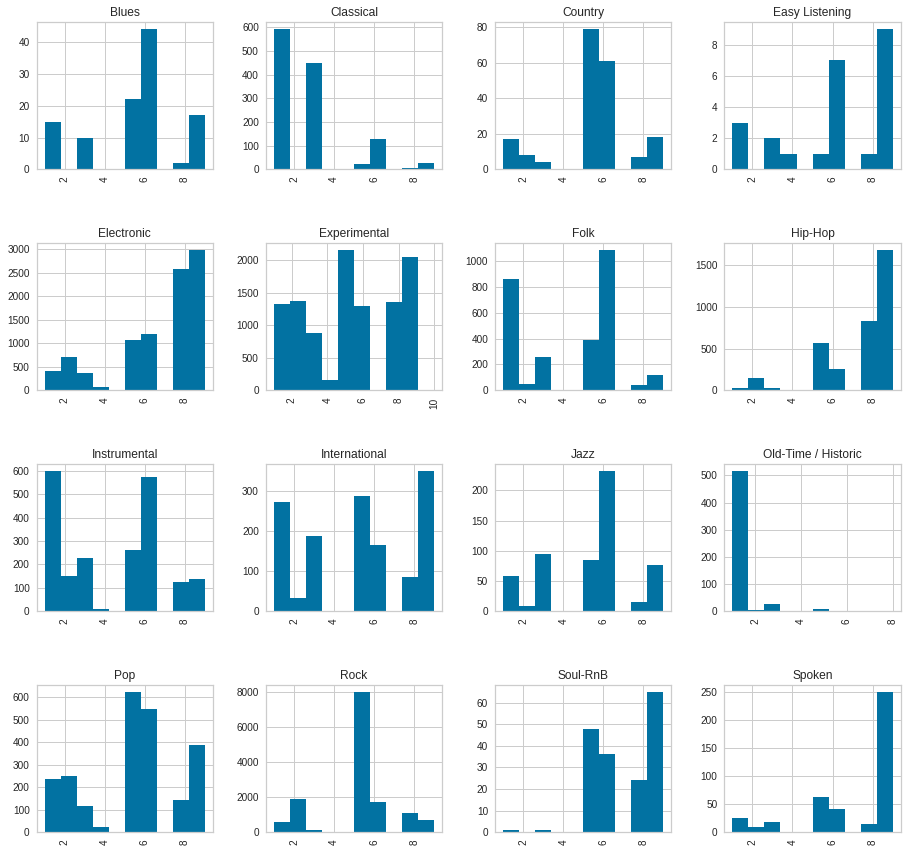

In [ ]:
Identifiers2.hist(column='#Clusters', by = 'Genre', figsize=(15,15))
plt.show()

With this implementation and change of variables, our clustering has not succeeded

# 3. Algorithmic questions


You are given a list of integers, A, and another integer s. Write an algorithm that outputs all the pairs in A that equal x.

For example, if:

    A = [7, -2, 8, 2, 6, 4, -7, 2, 1, 3, -3] and s = 4
the algorithm should output:  ```(7, -3), (-2, 6), (2, 2), (3, 1).```


In [50]:
def checkSum(A, s):
    pair = []
    for el in A:
        x = s - el # for every element we find the value that gives as back the requested sum
        if (x in A) == True: # we check if the value is in the list if yes, append the pair
            pair.append((el, x)) 

    return list(set(tuple(sorted(t)) for t in pair)) # we order the values inside the tuples so by using the set we will drop duplicates
             
A, s = [7, -2, 8, 2, 6, 4, -7, 2, 1, 3, -3], 4  
checkSum(A, s)                              

[(-2, 6), (1, 3), (2, 2), (-3, 7)]